# Lab 4

Sierra Wilde

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pandas as pd
import random

In [2]:
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = (20, 15)

## Problem 1

### 1.

In [4]:
#importing the gamma ray dataset
hf = h5py.File('gammaray_lab4.h5', 'r')

In [5]:
hf.keys()

<KeysViewHDF5 ['data']>

In [6]:
data = np.array(hf.get('data'))

In [7]:
data_table = pd.DataFrame(data).T
data_table.columns = ['Time (gps)', 'Solar Phase(deg)', 'Earth Longitude(deg)', 'Particle Counts']

Dataset of the number of gamma rays detected in a 100ms time period during a  25920001s time interval.

In [8]:
data_table

,Time (gps),Solar Phase(deg),Earth Longitude(deg),Particle Counts
0,940680016.0,315.000000,45.000000,10.0
1,940680016.1,315.007112,45.006667,8.0
2,940680016.2,315.014225,45.013333,7.0
3,940680016.3,315.021337,45.020000,11.0
4,940680016.4,315.028449,45.026667,8.0
5,940680016.5,315.035561,45.033333,11.0
6,940680016.6,315.042674,45.040000,5.0
7,940680016.7,315.049786,45.046667,10.0
8,940680016.8,315.056898,45.053333,9.0
9,940680016.9,315.064011,45.060000,8.0


Below is a histogram of the number of gamma ray counts over the entire measurement period.

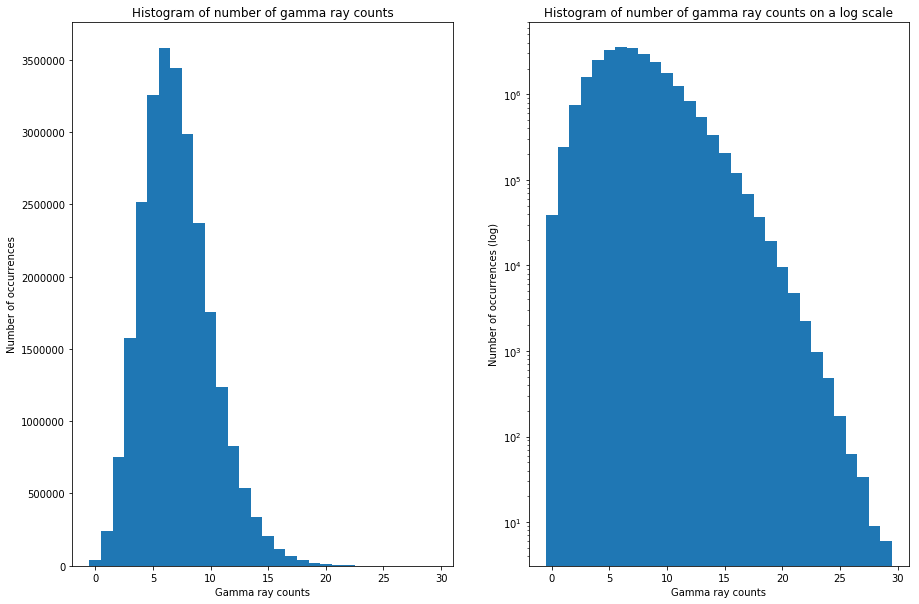

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
ax[0].set_title('Histogram of number of gamma ray counts')
ax[0].hist(data_table['Particle Counts'], bins=np.arange(0, data_table['Particle Counts'].max()+1), align='left')
ax[0].set_xlabel('Gamma ray counts')
ax[0].set_ylabel('Number of occurrences')
ax[1].set_title('Histogram of number of gamma ray counts on a log scale')
ax[1].hist(data_table['Particle Counts'], bins=np.arange(0, data_table['Particle Counts'].max()+1), align='left')
ax[1].set_xlabel('Gamma ray counts')
ax[1].set_ylabel('Number of occurrences (log)')
ax[1].set_yscale('log')
plt.show()

The overall gamma ray count distribution appears to follow a Possion distribtution which is described by:

$P(k) = \frac{\lambda^ke^{-\lambda}}{k!}$, where $\lambda$ is the expected number of counts in the time interval, and k is the observed number of counts.

In [10]:
print('The mean number of gamma ray counts from this dataset is {}'.format(np.mean(data_table['Particle Counts'])))

The mean number of gamma ray counts from this dataset is 7.09730524315952


It makes sense that this follows Poisson distribution, because it is a discrete distribution, and it describes the probability of counting events. From this single plot, the data does not appear to be contaminated. Future analysis will prove against this, however. This is strong evidence for always looking at different plots.

Here the data is averaged over every 100s interval. This will allow us to look over the entire time period without being too computationally taxing.

In [11]:
#average particle count every 100s
avg_100s_int = []
for i in np.arange(0, (len(data_table['Time (gps)'])-1)/1000):
    p = np.asarray(data_table['Particle Counts'])[int(1000*i):int(1000*(i+1))].sum()/1000
    avg_100s_int.extend([p])

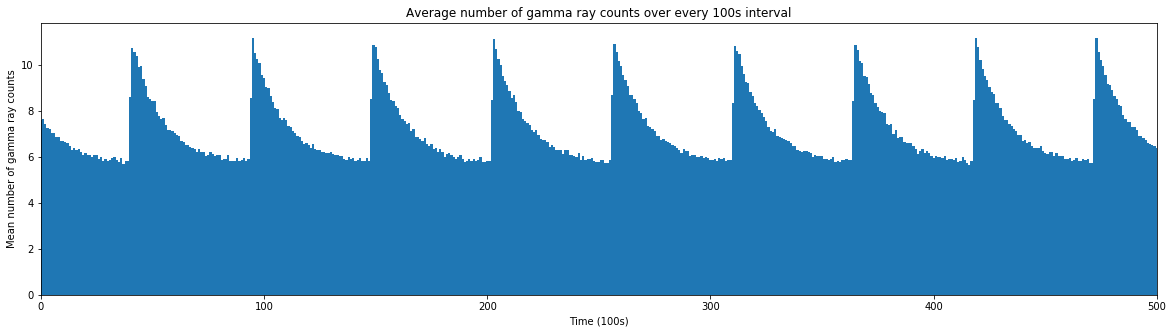

In [12]:
plt.figure(figsize=(20,5))
plt.title('Average number of gamma ray counts over every 100s interval')
plt.bar(np.arange(0, 25920), np.array(avg_100s_int), width=1)
plt.xlabel('Time (100s)')
plt.ylabel('Mean number of gamma ray counts')
plt.xlim(0, 500)
plt.show()

The background appears contaminated here because it is not constant as time goes on. The mean number of gamma ray counts follows some periodic function that, from inspection, appears to be an exponential decay. This means that the probability of number of counts changes over time, and thus a single probability distribtution would not fit the background well.

### 2.

In order to learn more about how the background changes, similar plots are made for the solar phase angle and the Earth longitudinal angle. They are both averaged over 100s intervals and plotted against time.

In [13]:
#average solar phase angle every 100s
solaravg_100s_int = []
for i in np.arange(0, (len(data_table['Time (gps)'])-1)/1000):
    p = np.asarray(data_table['Solar Phase(deg)'])[int(1000*i):int(1000*(i+1))].sum()/1000
    solaravg_100s_int.extend([p])

In [14]:
#average earth longitude angle every 100s
long_100s_int = []
for i in np.arange(0, (len(data_table['Time (gps)'])-1)/1000):
    p = np.asarray(data_table['Earth Longitude(deg)'])[int(1000*i):int(1000*(i+1))].sum()/1000
    long_100s_int.extend([p])

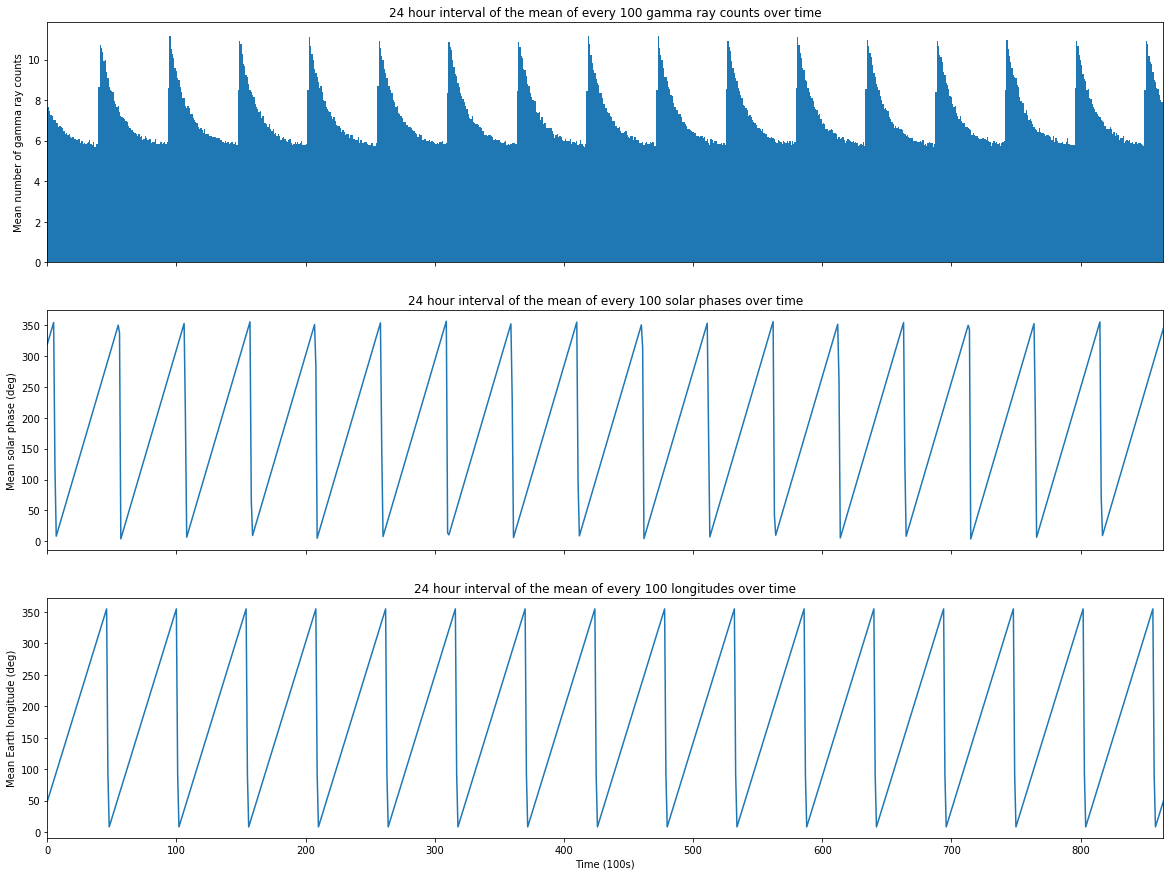

In [15]:
fig, ax = plt.subplots(3, 1, figsize=(20, 15), sharex=True)
ax[0].set_title('24 hour interval of the mean of every 100 gamma ray counts over time')
ax[0].bar(np.arange(0, 25920), np.array(avg_100s_int), width=1)
ax[0].set_ylabel('Mean number of gamma ray counts')
ax[1].set_title('24 hour interval of the mean of every 100 solar phases over time')
ax[1].plot(np.arange(0, 25920), np.array(solaravg_100s_int))
ax[1].set_ylabel('Mean solar phase (deg)')
ax[2].set_title('24 hour interval of the mean of every 100 longitudes over time')
ax[2].plot(np.arange(0, 25920), np.array(long_100s_int))
ax[2].set_xlim(0, 864)
ax[2].set_ylabel('Mean Earth longitude (deg)')
ax[2].set_xlabel('Time (100s)')
plt.show()

Here are the plots of gamma ray counts, solar phase angle, and Earth longitude angle against time. The peaks of the longitude and the number of gamma ray counts seem to line up fairly well. All of the periods of the cycles are around the 5400 second, or 90 minute mark. This makes sense because the satellite has an oribital period of 90 minutes.

### 3.

The model for the background is already created above, where the number of counts are averaged in 100 second intervals. This creates a probability distribtution at different times, based on the time dependence of the background. This therefore has a resolution of every 100s, and thus multiple datapoints that are slowly changing get lumped together into one distribution, however this effect is small based on a 5400s period. The data in this relatively little of a time span can be treated as time-dependent.

Below is a fit of the average number of counts over one period. The distribution looked exponential at first, but was found to be described by a different distribution more accurately.

In [16]:
#finding the maximum value in the first full period of the data
max_count = np.asarray(avg_100s_int[30:70]).max()
print(max_count)

10.736


In [17]:
#finding the time, or index, to where that value corresponds
max_count_index = np.where(np.asarray(avg_100s_int) == max_count)[0][0]
print(max_count_index)

41


In [18]:
#finding the minimum value in the first full period of the data
min_count = np.asarray(avg_100s_int[41:100]).min()
print(min_count)

5.828


In [19]:
#finding the time, or index, to where the minimum value corresponds
min_count_index = np.where(np.asarray(avg_100s_int) == min_count)[0][0]
print(min_count_index)

89


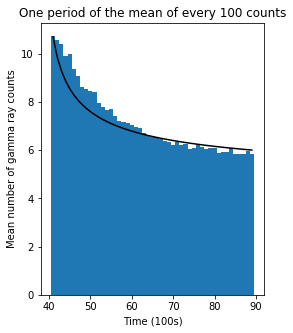

In [20]:
t = np.arange(41, 90)
a = np.log(5.828/10.736) / (41 - 89)

plt.figure(figsize=(4, 5))
plt.title('One period of the mean of every 100 counts')
plt.xlabel('Time (100s)')
plt.ylabel('Mean number of gamma ray counts')
plt.bar(t, np.array(avg_100s_int)[41:90], width=1)
plt.plot(t, np.array(avg_100s_int)[41:90][0]/(np.sqrt(t-38))+4.5, c='k')
plt.show()

The model above that fits the distribtution of averaged gamma counts over time goes as $\frac{1}{\sqrt{t}}$, with the full equation being:

$\lambda(t) = \frac{\lambda_o}{\sqrt{t-38}}+4.5$, where $\lambda_o$ is the peak value, which in this case is 10.736.

### 4.

Each time will have a different significance threshold, because the average number of counts changes over tiem. It will be helpful to see how the threshold changes over time. In order to test a few different 100-millisecond thresholds, 1000 different times, expressed as index numbers, are randomly generated.

In [21]:
#use a random integer generator to get 1000 different indices
time_list = random.sample(range(0, 25920000), 1000)
print(time_list)

[96190, 6613026, 15427129, 9944219, 18011377, 20318597, 18186097, 15020725, 11474192, 8472083, 1749211, 13198970, 605867, 20123038, 12166974, 5547359, 13761536, 11109499, 1850033, 11064673, 2202530, 5467097, 14595925, 2857976, 8290600, 14710844, 10788782, 23623687, 18275190, 25787501, 17055279, 10585125, 21087216, 21098661, 22812070, 10849784, 4761873, 8373001, 14649206, 4510741, 24642097, 9708536, 15395334, 932924, 1698459, 2363610, 4679071, 350345, 13785170, 17465856, 20460320, 20115672, 7292786, 15259867, 6273104, 2367141, 4315232, 15912989, 8171993, 9641400, 23563234, 21330987, 20814210, 6443638, 22162282, 18116610, 7148551, 10021803, 3497753, 15331901, 7836509, 15804453, 308710, 23941160, 18216142, 1278098, 4490113, 21845218, 17385626, 10148367, 11043668, 12396704, 15002131, 9033375, 2233081, 7099120, 16544877, 22934761, 20323452, 17976904, 24383060, 25366351, 8712799, 7929782, 4779572, 21668363, 1430547, 23160358, 21341366, 4576449, 6500157, 5629130, 9729147, 9467658, 7635350, 18

The significance of a detection against the Poisson gamma ray background distribution is determined by the probability to get that measurement and what that same probability corresponds to on the Gaussian probability distribution. The value needed in order to produce a 5$\sigma$ significance with a given mean $\lambda$ is:

$\sigma = 2 \cdot erf^{-1}(\int_x^{\infty}P(k)dk$, where $P(k)$ is the Poisson distribution, with a mean that changes in time as discussed above.

In [22]:
#finding the 5 sigma values of each time
time_list = np.sort(time_list)
five_sigma = []
for time in time_list:
    #find the distribution where each time lies
    k = data_table['Particle Counts'][time]
    mean = avg_100s_int[int(time/1000)]
    #prob = stats.poisson.cdf(k, mean)
    prob = stats.norm.sf(5)
    sigma = stats.poisson.isf(prob, mean)
    five_sigma.extend([sigma])
print(five_sigma)

[25.0, 29.0, 30.0, 22.0, 26.0, 23.0, 27.0, 22.0, 22.0, 21.0, 21.0, 26.0, 23.0, 22.0, 24.0, 23.0, 21.0, 21.0, 26.0, 24.0, 22.0, 23.0, 23.0, 31.0, 28.0, 23.0, 21.0, 23.0, 23.0, 30.0, 23.0, 21.0, 26.0, 22.0, 26.0, 22.0, 24.0, 23.0, 22.0, 21.0, 22.0, 29.0, 25.0, 22.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 23.0, 22.0, 22.0, 22.0, 21.0, 23.0, 22.0, 22.0, 22.0, 30.0, 26.0, 24.0, 28.0, 25.0, 21.0, 21.0, 21.0, 21.0, 22.0, 22.0, 30.0, 24.0, 23.0, 22.0, 25.0, 26.0, 23.0, 23.0, 31.0, 29.0, 25.0, 23.0, 23.0, 21.0, 22.0, 28.0, 30.0, 27.0, 22.0, 23.0, 22.0, 22.0, 23.0, 22.0, 21.0, 30.0, 22.0, 22.0, 22.0, 26.0, 23.0, 23.0, 29.0, 27.0, 25.0, 25.0, 24.0, 22.0, 23.0, 21.0, 31.0, 23.0, 24.0, 22.0, 22.0, 22.0, 22.0, 21.0, 31.0, 22.0, 25.0, 22.0, 27.0, 31.0, 22.0, 26.0, 23.0, 27.0, 31.0, 29.0, 22.0, 22.0, 31.0, 28.0, 27.0, 22.0, 21.0, 22.0, 27.0, 22.0, 28.0, 22.0, 29.0, 22.0, 30.0, 28.0, 22.0, 21.0, 23.0, 23.0, 25.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 27.0, 26.0, 22.0, 23.0, 21.0, 26.0, 22.0, 22.0, 27.

In [23]:
print(np.asarray(five_sigma).min())
print(np.asarray(five_sigma).max())

21.0
31.0


Text(0, 0.5, 'Number of counts that correspond with a 5 sigma significance')

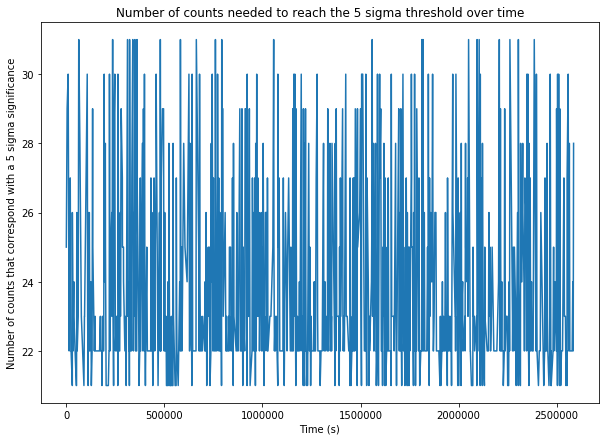

In [24]:
plt.figure(figsize = (10, 7))
plt.title('Number of counts needed to reach the 5 sigma threshold over time')
plt.plot(np.asarray(time_list)/10, five_sigma)
plt.xlabel('Time (s)')
plt.ylabel('Number of counts that correspond with a 5 sigma significance')

The number of counts from the sample of 1000 100-millisecond gamma ray backgrounds needed in order to be significant range from 21 to 31. As one would expect, given the time variance of the background, the 5$\sigma$ threshold varies in time as well. There is a greater probability of a high count rate during times when the background has a peak mean. This makes sense because the mean corresponds to the number of counts expected, and thus it is more likely to see a greater number of counts during these time intervals.

The cause of the variable background is most likely from a combination of the solar phase and the Earth longitude. Since the sun, Earth, and the moon all act as gamma ray sinks, their positions with respect to the satellite will change the number of gamma rays that it will be able to detect at given time.

## Problem 2

### 1.

In [25]:
hf2 = h5py.File('images.h5', 'r')

In [26]:
hf2.keys()

<KeysViewHDF5 ['image1', 'imagestack']>

In [27]:
data2 = np.array(hf2.get('image1'))
data3 = np.array(hf2.get('imagestack'))

I will be looking for faint stars in the telescope images.

### 2.

The loaded telescope images are plotted below, both the single, and the stacked images.

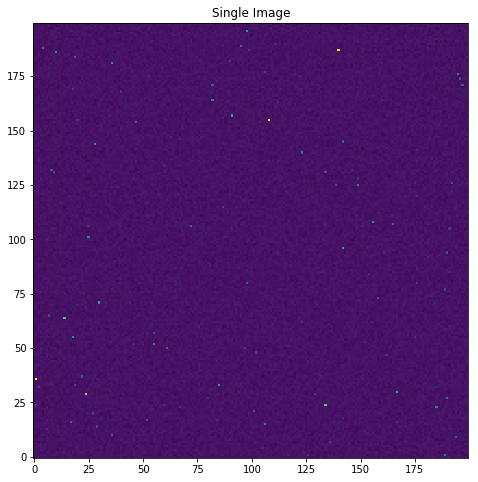

In [140]:
plt.figure(figsize=(8,8))
plt.title('Single Image')
plt.imshow(data2, origin='lower')

In [141]:
print(len(data3))
print(len(data3[0]))
print(len(data3[0][0]))

200
200
10


The array of stacked images has the wrong dimension, it needs to be 10x200x200 instead of 200x200x10. The axes are backwards. Below rearranges the axes in order to view the images properly:

In [142]:
print(len(np.swapaxes(data3, 0, 2)))

10


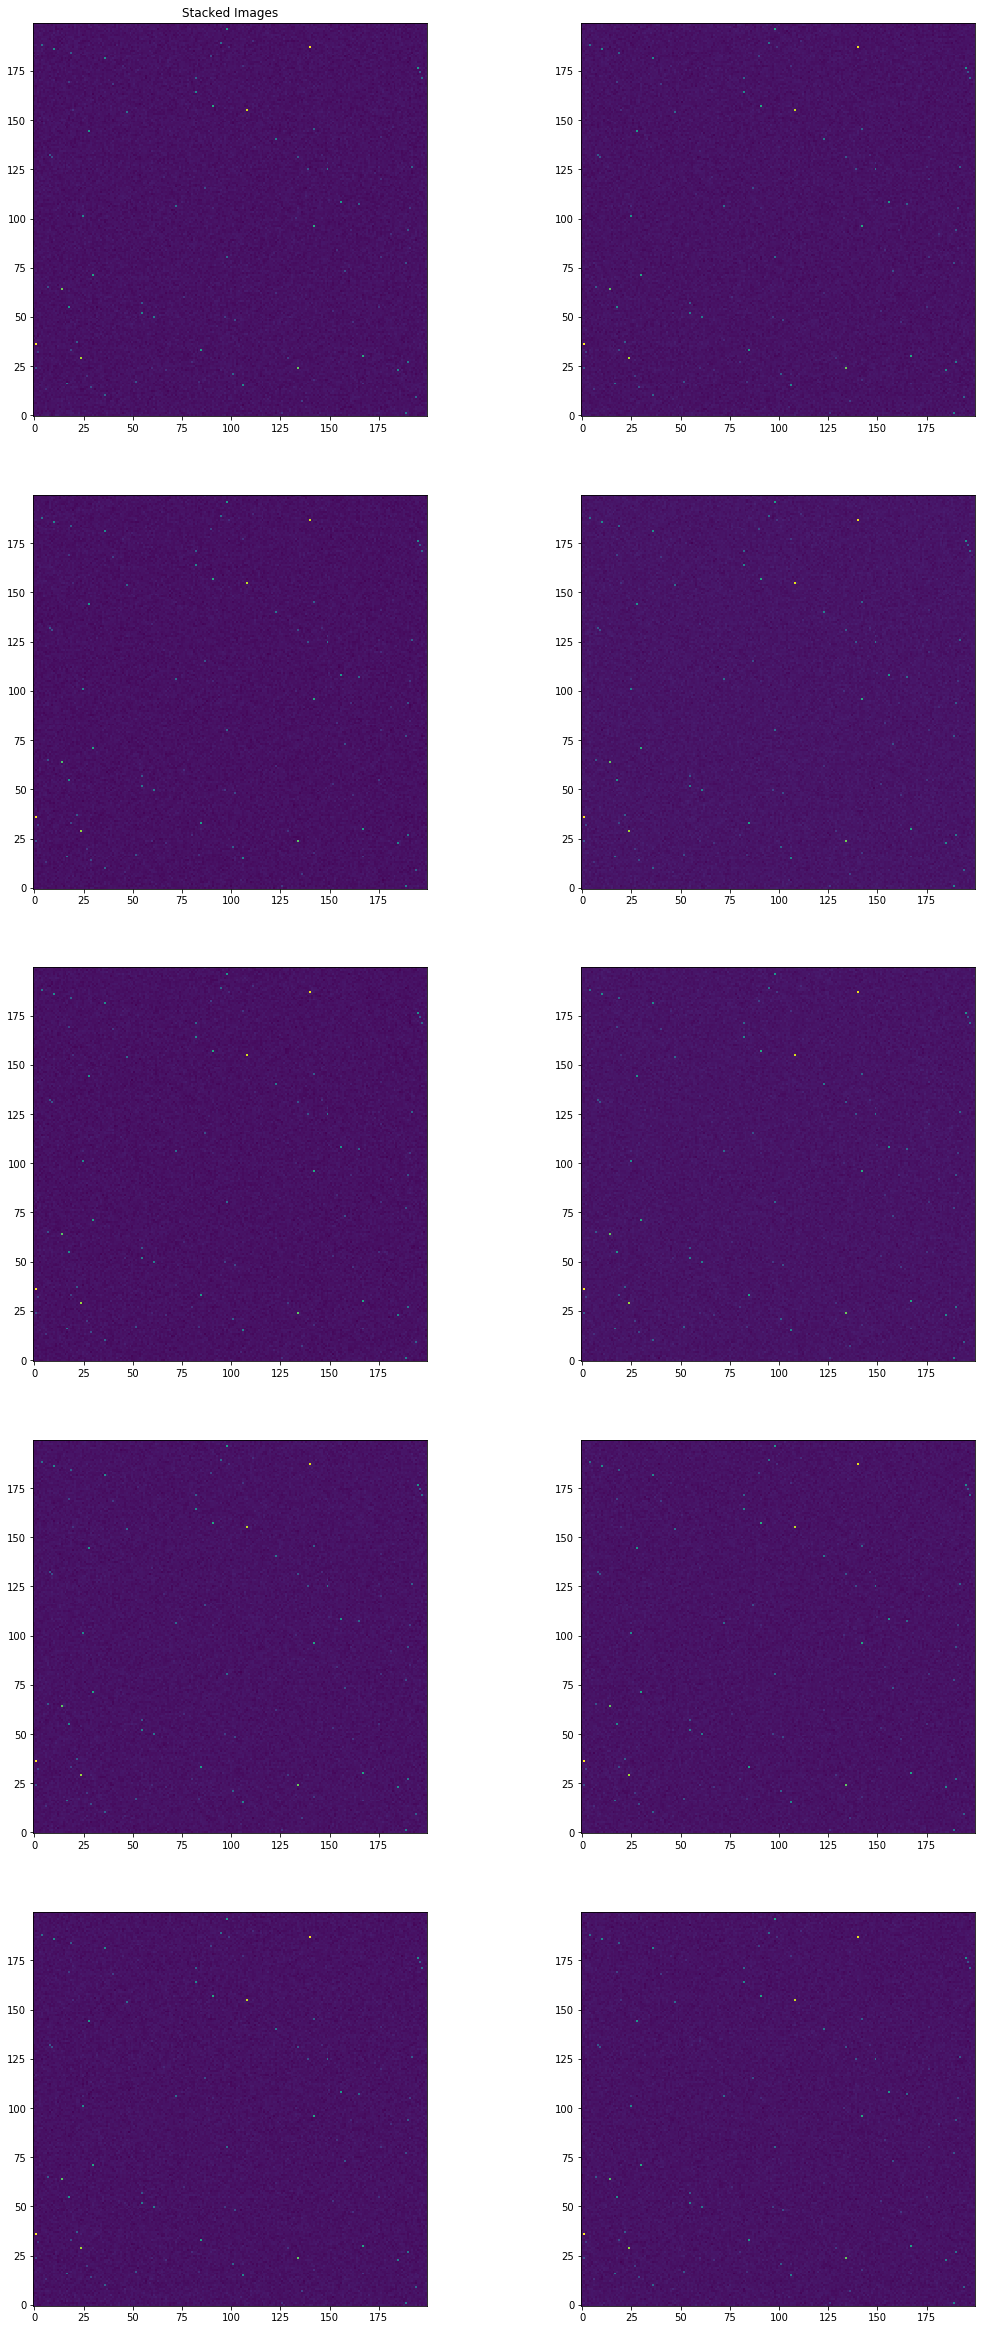

In [143]:
im_stack_mid = np.swapaxes(data3, 0, 2)
image_stack = np.swapaxes(im_stack_mid, 1, 2)
fig, axes = plt.subplots(5, 2, figsize=(18, 42))
axes[0][0].set_title('Stacked Images')
for ax, image in zip(axes.flatten(), image_stack):
    ax.imshow(image, origin='lower')

The background looks constant in time. Looking at the images, there doesn't appear to be any starck contrasts in the background. In each image, the background looks spatial consistent as well. The only contaminations are the stars, which are in the same place in each image.

In order to look for faint stars, it will be wise to average the images together. The background's spread will decrease, and therefore it will be easier to distinguish faint stars from noise.

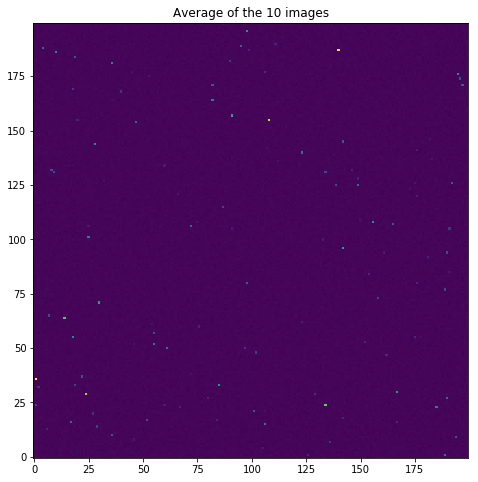

In [159]:
#plotting an average of the images
avg_image = np.sum(image_stack, axis=0)/10

plt.figure(figsize=(8, 8))
plt.title('Average of the 10 images')
plt.imshow(avg_image, origin='lower')

This reduces the background effectively, and fainter stars are much more visible already, just by looking at the image. However, it is important to know which of these bright spots are statistically significant, so that they can definitively be categorized as stars. The average background supports that it is spatially constant.

A random sample of the pixels can be taken in order to obtain a good background probability distribtution. By looking at the distribution of the brightness of each of the pixels sample, an estimate of the background can be obtained. The stars are sparse enough that by randomly choosing pixels in the images, the signal from the stars will be negligible.

In [145]:
200 * 200 

40000

There is a total of 40,000 pixels in the averaged image, which means that the sample should be 10%, or 4000. I will generate 8000 random numbers to get the indices of 4000 random pixels.

In [146]:
#generating random indices
first_axis = []
for x in range(4000):
    first_axis.extend([random.randint(0, 199)])
second_axis = []
for x in range(4000):
    second_axis.extend([random.randint(0, 199)])

In [147]:
#making a mask of the averaged image to get a sample of brightnesses
background_sample = avg_image[first_axis][second_axis]
print(background_sample)

[[ 2.35674903e-01  2.50533600e-01 -1.09472633e-01 ... -1.86890405e-01
   7.51443143e-02  4.75749792e-01]
 [ 2.71699085e-01 -1.23523969e-01  6.88527194e+00 ... -4.08746265e-01
   1.28333031e-01 -1.67775088e-01]
 [ 4.03042147e-02  1.83848493e-01 -9.70490327e-02 ...  1.39548982e-02
  -2.86863097e-01  2.91421354e-02]
 ...
 [-6.86872514e-02  1.96219782e-01 -3.91735794e-01 ...  9.93392389e-02
  -2.65966389e-01  2.73607618e-01]
 [-9.64038545e-02 -3.32529445e-01  5.22147633e-03 ...  1.04269450e-01
  -1.30911621e-01 -1.49221010e-01]
 [-1.22845170e-01  5.02554601e-03  9.69055201e-02 ... -4.82069850e-02
   1.89554881e-01  9.57769065e-03]]


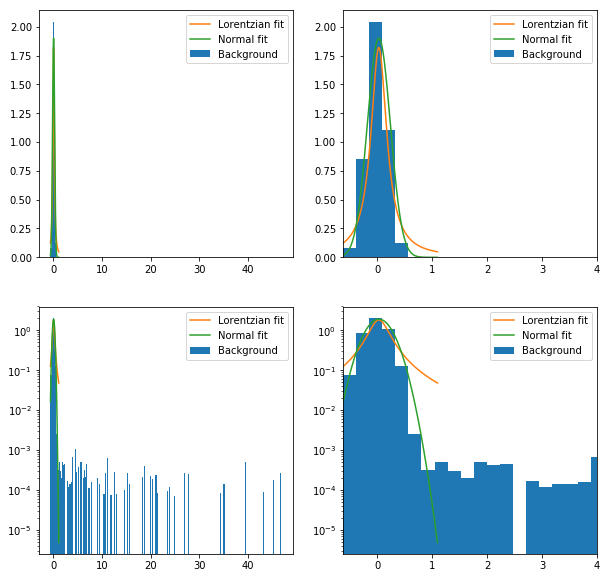

In [148]:
#plotting a histogram of the background
x = np.linspace(background_sample.flatten().min(), 1.1, 10000)
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0][0].hist(background_sample.flatten(), bins=200, density=True, label='Background')
ax[0][0].plot(x, stats.cauchy.pdf(x, .0334, .175), label='Lorentzian fit')
ax[0][0].plot(x, stats.norm.pdf(x, .0334, .21), label = 'Normal fit')
ax[0][0].legend()
ax[0][1].hist(background_sample.flatten(), bins=200, density=True, label='Background')
ax[0][1].plot(x, stats.cauchy.pdf(x, .0334, .175), label='Lorentzian fit')
ax[0][1].plot(x, stats.norm.pdf(x, .0334, .21), label = 'Normal fit')
ax[0][1].set_xlim(background_sample.flatten().min(), 4)
ax[0][1].legend()
ax[1][0].hist(background_sample.flatten(), bins=200, density=True, label='Background')
ax[1][0].plot(x, stats.cauchy.pdf(x, .0334, .175), label='Lorentzian fit')
ax[1][0].plot(x, stats.norm.pdf(x, .0334, .21), label = 'Normal fit')
ax[1][0].set_yscale('log')
ax[1][0].legend()
ax[1][1].hist(background_sample.flatten(), bins=200, density=True, label='Background')
ax[1][1].plot(x, stats.cauchy.pdf(x, .0334, .175), label='Lorentzian fit')
ax[1][1].plot(x, stats.norm.pdf(x, .0334, .21), label = 'Normal fit')
ax[1][1].set_xlim(background_sample.flatten().min(), 4)
ax[1][1].set_yscale('log')
ax[1][1].legend()

In [149]:
print(background_sample.flatten().mean())
print(np.std(background_sample.flatten()))

0.03531438311417482
0.9499601391759058


Here I assume that the main peak is the background, and the rest of the peaks, which are sparse and only visible on the log plot, are stars. The background fits a Gaussian distribution centered around a mean of 0.0334, and a standard deviation of about 0.21. I also tried a Lorentz distribution, but that did not fit the nearly as well.

The Gaussian distribution is described by $P(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{\frac{(x-\mu)^2}{2\sigma^2}}$ where $\mu = 0.0334$ and $\sigma = 0.21$.

### 3.

The brightness 5$\sigma$ threshold from the background should be found before any searching goes on. That way I have some idea of what magnitude brightness can be considered a star. To find the 5$\sigma$ value, the probability ditribution must be set equal to the probability of a standard Gaussian, which has a mean of 0 and a standard deviation of 1, at a certain X$\sigma$. In this case the integral will be one-sided, because only brighter values will be considered signals, not dimmer values.

$\int_{\chi}^{\infty}\frac{1}{\sqrt{2\pi\sigma^2}}e^{\frac{(x-\mu)^2}{2\sigma^2}}dx = 1-erf(\frac{X\sigma}{\sqrt{2}})$

$X\sigma = 5$, and thus

$1-erf(\frac{\chi-\mu}{\sqrt{2}\sigma}) = 1-erf(\frac{X\sigma}{\sqrt{2}})$

$\chi = X\sigma\cdot\sigma+\mu = 1.083$

Any brightness with a value over 1.083 can be determined to be a star.

Now all the values in the averaged image that are over the threshold of 1.083, must be found. Then they can be plotted and compared to the image.

In [150]:
#creating a mask of all of the places where the brightness is over 1.083
star_mask = avg_image[np.where(avg_image>1.083)]

In [151]:
print(len(star_mask))

123


Using the background, 123 stars in the image can be discriminated from the background using the 5$\sigma$ threshold.

In [160]:
#creating an array with only the stars
avg_image_stars = np.sum(image_stack, axis=0)/10
avg_image_stars[avg_image_stars > 1.083] = 100

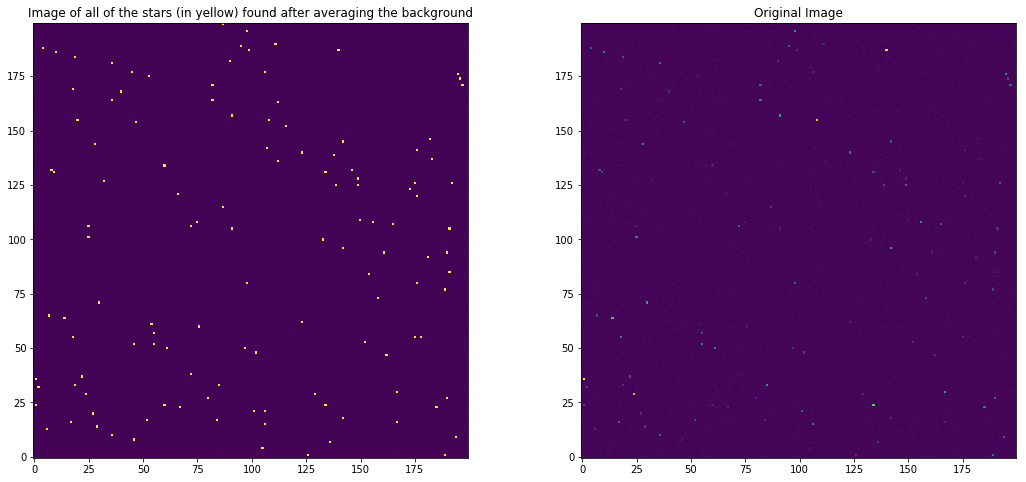

In [161]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
ax[0].set_title('Image of all of the stars (in yellow) found after averaging the background')
ax[0].imshow(avg_image_stars, origin='lower')
ax[1].set_title('Original Image')
ax[1].imshow(avg_image, origin='lower')

Here shows the stars that were above the background threshold beside the original, averaged image for comparison. Most of the stars are able to be seen with ease on the original image, but some are much fainter. Averaging the 10 images makes the background's spread much smaller, which makes it much easier to detect the very faint stars that would have been considered background before.

### 4.

The probability distribution for looking for transient signals is different, because averaging the images would make the signal's significance decrease. It would only show up in one image, and thus it would be averaged with noise. The transient signal would be found by finding the difference in the brightnesses of each image, rather than the average. The pixels with the greatest brightness difference between images would most likely indicate a transient signal.